## 9. ANN
What we are going to do is customer churn prediction. This predicts the reason why customers leave a business. We are going to use the customer churn data in telecom business from kaggle, and going to build an ANN model to predict. 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
6688  0064-SUDOG  Female              0     Yes        Yes      12   
2223  8182-BJDSI  Female              0      No         No      28   
4975  4822-LPTYJ    Male              0     Yes         No      72   
1130  5859-HZYLF    Male              0     Yes        Yes      26   
6984  6447-GORXK    Male              0      No        Yes      31   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
6688          Yes                No              No  No internet service  ...   
2223          Yes               Yes     Fiber optic                   No  ...   
4975          Yes               Yes     Fiber optic                   No  ...   
1130          Yes                No              No  No internet service  ...   
6984           No  No phone service             DSL                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
6688  No internet service  No internet service  No internet service   
2223                   No                   No                   No   
4975                  Yes                   No                  Yes   
1130  No internet service  No internet service  No internet service   
6984                   No                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
6688  No internet service        Two year               No   
2223                  Yes  Month-to-month              Yes   
4975                  Yes        Two year              Yes   
1130  No internet service        Two year              Yes   
6984                   No  Month-to-month               No   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
6688  Bank transfer (automatic)          20.30         224.5    No  
2223           Electronic check          89.95       2625.55   Yes  
4975  Bank transfer (automatic)         103.75        7346.2    No  
1130    Credit card (automatic)          19.15        515.75    No  
6984    Credit card (automatic)          25.00         789.2    No  

[5 rows x 21 columns]

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.drop('customerID', axis = 'columns',inplace=True)
df.dtypes # they are all in objects

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [17]:
pd.to_numeric(df.TotalCharges) #we need to change the types
# but failed because of spaces in the values

ValueError: Unable to parse string " " at position 488

In [18]:
pd.to_numeric(df.TotalCharges, errors='coerce') # ignore erroneous values

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [19]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull() # see the erroneous values with 'True'

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [21]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()] # see the columns with erroneous values

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [23]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape # see the size 

(11, 20)

In [24]:
df.shape # see the size of the original table

(7043, 20)

In [25]:
df.iloc[488] # the way of indexing

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [26]:
df1 = df[df.TotalCharges!=' '] # we dropped the erroneous rows 
df1

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7032 rows x 20 columns]

In [31]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) #successfully converted

C:\Users\sienn\AppData\Local\Temp\ipykernel_8212\1060498761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges) #successfully converted


In [32]:
df1.TotalCharges.dtypes

dtype('float64')

In [33]:
df1[df1.Churn=='No'] # the person is not leaving 

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
3       Male              0      No         No      45           No   
6       Male              0      No        Yes      22          Yes   
7     Female              0      No         No      10           No   
...      ...            ...     ...        ...     ...          ...   
7037  Female              0      No         No      72          Yes   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService       OnlineSecurity  \
0     No phone service             DSL                   No   
1                   No             DSL                  Yes   
3     No phone service             DSL                  Yes   
6                  Yes     Fiber optic                   No   
7     No phone service             DSL                  Yes   
...                ...             ...                  ...   
7037                No              No  No internet service   
7038               Yes             DSL                  Yes   
7039               Yes     Fiber optic                   No   
7040  No phone service             DSL                  Yes   
7042                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
0                     Yes                   No                   No   
1                      No                  Yes                   No   
3                      No                  Yes                  Yes   
6                     Yes                   No                   No   
7                      No                   No                   No   
...                   ...                  ...                  ...   
7037  No internet service  No internet service  No internet service   
7038                   No                  Yes                  Yes   
7039                  Yes                  Yes                   No   
7040                   No                   No                   No   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
0                      No                   No  Month-to-month   
1                      No                   No        One year   
3                      No                   No        One year   
6                     Yes                   No  Month-to-month   
7                      No                   No  Month-to-month   
...                   ...                  ...             ...   
7037  No internet service  No internet service        Two year   
7038                  Yes                  Yes        One year   
7039                  Yes                  Yes        One year   
7040                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
3                  No  Bank transfer (automatic)           42.30   
6                 Yes    Credit card (automatic)           89.10   
7                  No               Mailed check           29.75   
...               ...                        ...             ...   
7037              Yes  Bank transfer (automatic)           21.15   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
70

Churn - Tenure 

In [36]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

Text(0.5, 1.0, 'Customer Churn Prediction')

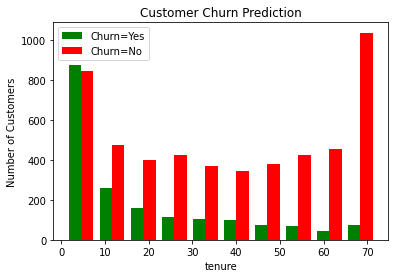

In [40]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction")

Churn - Monthly Charges

Text(0.5, 1.0, 'Customer Churn Prediction')

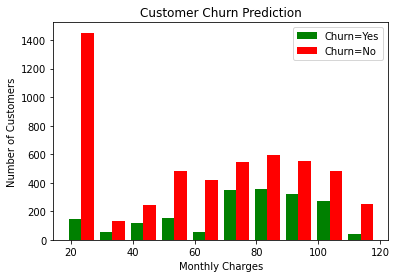

In [42]:
mon_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mon_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([mon_churn_yes, mon_churn_no], color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction")

In [48]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes =='object':
            print(f'{column}: {df[column].unique()}') # show the unique values for each column

In [49]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [57]:
df1.replace('No internet service', 'No',inplace=True)
df1.replace('No phone service', 'No',inplace=True)

C:\Users\sienn\AppData\Local\Temp\ipykernel_8212\3489195538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No',inplace=True)
C:\Users\sienn\AppData\Local\Temp\ipykernel_8212\3489195538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No',inplace=True)


In [58]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1 'No']
OnlineBackup: [1 0 'No']
DeviceProtection: [0 1 'No']
TechSupport: [0 1 'No']
StreamingTV: [0 1 'No']
StreamingMovies: [0 1 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [59]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\sienn\AppData\Local\Temp\ipykernel_8212\1648037665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [62]:
for column in df1:
    print(f'{column}: {df1[column].unique()}') # show the unique values for each column

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [63]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\sienn\AppData\Local\Temp\ipykernel_8212\3951318906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [64]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [66]:
pd.get_dummies(data=df1, columns=['InternetService']) #get one-hot encoding

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      StreamingMovies        Contract  PaperlessBilling  \
0                   0  Month-to-month                 1   
1                   0        One year                 0   
2                   0  Month-to-month                 1   
3                   0        One year                 0   
4                   0  Month-to-month                 1   
...               ...             ...               ...   
7038                1        One year                 1   
7039                1        One year                 1   
7040                0  Month-to-month                 1   
7041                0  Month-to-month                 1   
7042                1        Two year                 1   

                  PaymentMethod  MonthlyCharges TotalCharges  Churn  \
0              Electronic check           29.85        29.85      0   
1                  Mailed check           56.95      1889.50      0   
2                  Mailed check           53.85       108.15      1   
3     Bank transfer (automatic)           42.30      1840.75      0   
4              Electronic check           70.70       151.65      1   
...                         ...             ...          ...    ...   
7038               Mailed check           84.80      1990.50      0   
7039    Credit card (automatic)          103.20      7362.90      0   
7040           Electronic check           29.60       346.45      0   
7041               Mailed check           74.40       306.60      1   
7042  Bank transfer (automatic)          105.65      6844.50      0   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  
0                       1                            0                   0  
1                       1                            0                   0  
2                       1                            0                   0  
3                       1                            0                   0  
4                       0                            1                   0  
...                   ...                          ...                 ...  
7038                    1                            0                   0  
7039                    0 

In [67]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract','PaymentMethod']) 
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [68]:
df2.sample(4) # made new columns for one-hot encoding

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
6587       0              1        0           0      64             1   
5806       1              0        0           1       2             1   
6957       0              0        0           0       9             1   
2349       0              0        1           1      72             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
6587              1               1             1                 0  ...   
5806              0               0             0                 0  ...   
6957              0               0             0                 0  ...   
2349              1               0             1                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
6587                    0                            1                   0   
5806                    0                            0                   1   
6957                    0                            1                   0   
2349                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
6587                        1                  0                  0   
5806                        1                  0                  0   
6957                        1                  0                  0   
2349                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
6587                                        1   
5806                                        0   
6957                                        0   
2349                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6587                                      0                               0   
5806                                      0                               1   
6957                                      0                               1   
2349                                      0                               0   

      PaymentMethod_Mailed check  
6587                           0  
5806                           0  
6957                           0  
2349                           0  

[4 rows x 27 columns]

In [70]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges'] #columns that are needed to be scaled

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [71]:
df2

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          1              0        1           0  0.000000             0   
1          0              0        0           0  0.464789             1   
2          0              0        0           0  0.014085             1   
3          0              0        0           0  0.619718             0   
4          1              0        0           0  0.014085             1   
...      ...            ...      ...         ...       ...           ...   
7038       0              0        1           1  0.323944             1   
7039       1              0        1           1  1.000000             1   
7040       1              0        1           1  0.140845             0   
7041       0              1        1           0  0.042254             1   
7042       0              0        0           0  0.915493             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1                       1                            0                   0   
2                       1                            0                   0   
3                       1                            0                   0   
4                       0                            1                   0   
...                   ...                          ...                 ...   
7038                    1                            0                   0   
7039                    0                            1                   0   
7040                    1                            0                   0   
7041                    0                            1                   0   
7042                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7038                        0                  1                  0   
7039                        0                  1                  0   
7040                        1                  0                  0   
7041                        1                  0                  0   
7042                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0  

### Building a neural network

In [72]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [74]:
X_train.shape

(5625, 26)

In [75]:
X_test.shape

(1407, 26)

In [76]:
X_train[:10]

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
5664       1              1        0           0  0.126761             1   
101        1              0        1           1  0.000000             1   
2621       0              0        1           0  0.985915             1   
392        1              1        0           0  0.014085             1   
1327       0              0        1           0  0.816901             1   
3607       1              0        0           0  0.169014             1   
2773       0              0        1           0  0.323944             0   
1936       1              0        1           0  0.704225             1   
5387       0              0        0           0  0.042254             0   
4331       0              0        0           0  0.985915             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
5664              0               0             0                 1  ...   
101               0               0             0                 0  ...   
2621              0               0             1                 1  ...   
392               0               0             0                 0  ...   
1327              1               0             0                 1  ...   
3607              0               1             0                 0  ...   
2773              0               0             0                 1  ...   
1936              0               1             1                 0  ...   
5387              0               0             0                 0  ...   
4331              1               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
5664                    0                            1                   0   
101                     0                            0                   1   
2621                    1                            0                   0   
392                     1                            0                   0   
1327                    0                            1                   0   
3607                    1                            0                   0   
2773                    1                            0                   0   
1936                    1                            0                   0   
5387                    1                            0                   0   
4331                    0                            0                   1   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
5664                        1                  0                  0   
101                         1                  0                  0   
2621                        0                  0                  1   
392                         1                  0                  0   
1327                        0                  1                  0   
3607                        0                  1                  0   
2773                        1                  0                  0   
1936                        0                  1                  0   
5387                        1                  0                  0   
4331                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
5664                                        0   
101                                         0   
2621                                        0   
392                                         0   
1327                                        1   
3607                                        0   
2773                                        0   
1936                                        1   
5387                                        0   
4331                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
5664                                      1                             

In [77]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'), #chose relu 'cause it's easy to compute
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5152 - accuracy: 0.7477
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7959
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.7996
Epoch 4/100
176/176 [==============================] - 0s 892us/step - loss: 0.4172 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 0s 925us/step - loss: 0.4144 - accuracy: 0.8068
Epoch 6/100
176/176 [==============================] - 0s 996us/step - loss: 0.4128 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 0s 959us/step - loss: 0.4067 

176/176 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8284
Epoch 81/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8290
Epoch 82/100
176/176 [==============================] - 0s 874us/step - loss: 0.3632 - accuracy: 0.8288
Epoch 83/100
176/176 [==============================] - 0s 803us/step - loss: 0.3633 - accuracy: 0.8286
Epoch 84/100
176/176 [==============================] - 0s 766us/step - loss: 0.3623 - accuracy: 0.8292
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8274
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8267
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8292
Epoch 88/100
176/176 [==============================] - 0s 860us/step - loss: 0.3609 - accuracy: 0.8288
Epoch 89/100
176/176 [==============================] - 0s 729us/step - loss: 0.3602 - 

In [78]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 646us/step - loss: 0.4822 - accuracy: 0.7747


[0.48215770721435547, 0.7746979594230652]

In [79]:
yp = model.predict(X_test)
yp

array([[0.27257472],
       [0.49649435],
       [0.00985825],
       ...,
       [0.6943356 ],
       [0.61127174],
       [0.8858193 ]], dtype=float32)

In [80]:
y_test[:5] # have different shape compared to above, and it only contains 0 or 1

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [81]:
y_pred = []
for el in yp:
    if el > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [83]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       999
           1       0.65      0.49      0.56       408

    accuracy                           0.77      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

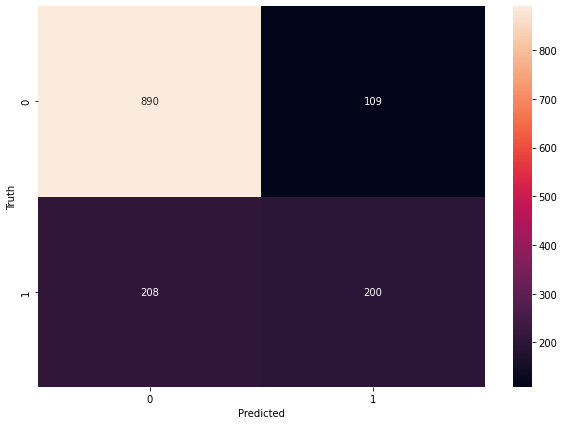

In [86]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth') 
# When truth is 1, the accuracy was not that great 

Accuracy

In [88]:
round((890+200)/(890+109+208+200),2)

0.77

In [89]:
round(890/(890+109),2) # accuracy when truth is 0

0.89

In [90]:
round(208/(208+200),2) # accuracy when truth is 1

0.51